In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import datetime
import seaborn as sns
import statsmodels.api as sm # import statsmodels 
import random

%matplotlib inline
#os.chdir('/Users/flatironschooldc3/FlatironSchoolRepo/dc-ds-111819/module-1/project/unzipped_data')
os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data/')



# ''' Our to do list .   '''
# '''
# 1) Get a nice plot for time trends

# 2) Run regression with ROI

# 3) Clean up Genre + Make Dummies

# 4) Segmenting anaylsis by moive budget, time, studio, maybe other categories



#IMPORTANT
#Clean genre variable

# '''

In [69]:
films = pd.read_csv('films.csv')
films2 = pd.read_csv('imdbom.csv')
films_yr = films.groupby('year').agg(['mean'])

In [15]:
films_yr.columns = [x for (x,y) in films_yr.columns]
films_yr.reset_index(inplace=True)
films_yr.columns

Index(['year', 'Unnamed: 0', 'runtime_minutes', 'averagerating', 'numvotes',
       'domestic_gross_x', 'foreign_gross', 'production_budget',
       'worldwide_gross', 'domestic_roi', 'worldwide_roi', 'popularity',
       'vote_average', 'vote_count', 'title_change'],
      dtype='object')

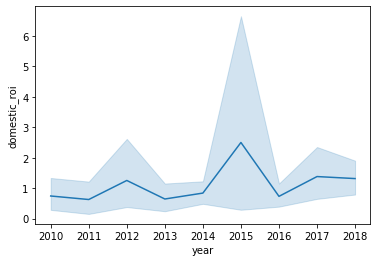

In [16]:
films_yr['sub'] = 0 #add a null column that seaborn needs
#see https://stackoverflow.com/questions/42955079/seaborn-tsplot-not-showing-data

# Using lineplot instead of tsplot (based on notice for deprecated function)
sns.lineplot(data=films, x='year',y='domestic_roi')

# sns.tsplot(films_yr, time='year',value='domestic_roi',unit='sub')
# sns.tsplot(films_yr, time='year',value='worldwide_roi',unit='sub')
# sns.tsplot(films_yr, time='year',value='production_budget',unit='sub')
# sns.tsplot(films_yr, time='year',value='popularity',unit='sub')
# sns.tsplot(films_yr, time='year',value='averagerating',unit='sub')

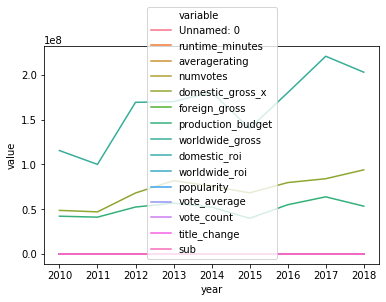

In [19]:
# How everything look together?
sns.lineplot(data=pd.melt(films_yr, ['year']), x='year',y='value', hue='variable')

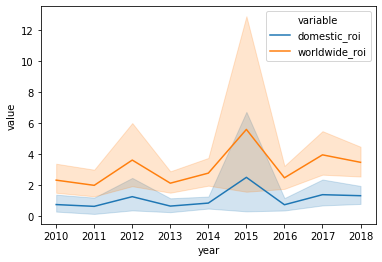

In [6]:
# Plot relevant subsets of data together on one plot by first subetting df

films_roi=films.filter(items=['year','domestic_roi', 'worldwide_roi'])
sns.lineplot(data=pd.melt(films_roi, ['year']), x='year',y='value', hue='variable', legend='full')

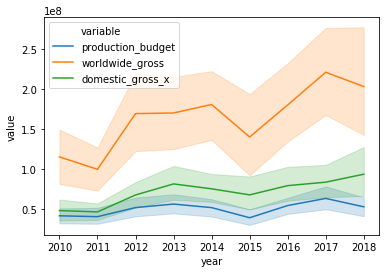

In [7]:
films_bd=films.filter(items=['year','production_budget','worldwide_gross', 'domestic_gross_x'])
sns.lineplot(data=pd.melt(films_bd, ['year']), x='year',y='value', hue='variable', legend='full')

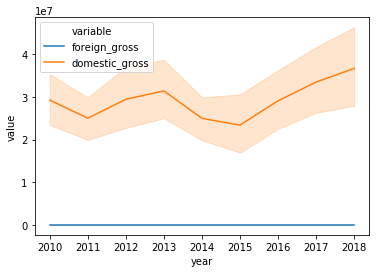

In [8]:
films2_bd=films2.filter(items=['year','foreign_gross', 'domestic_gross'])
sns.lineplot(data=pd.melt(films2_bd, ['year']), x='year',y='value', hue='variable', legend='full')

In [254]:
os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data')
films=pd.read_csv('films.csv')
genres = set(films.genres.apply(lambda x: str(x).split(',')).sum())
for genre in genres:
    films[genre] = films.genres.str.contains(genre)*1
    films[genre] = films[genre].fillna(0)
films['rgenre'] = films['genres'].apply(lambda x: random.choice(str(x).split(",")))

#create data subsets
films_big = films.loc[films['production_budget']>=10**6]
films_sml = films.loc[films['production_budget']<10**6]
films_std = films.loc[films.studio.notnull()]
films_ind = films.loc[films.studio.isna()]



subsets        = [films_big,films_sml,films_std,films_ind]
dependent_vars = ['domestic_roi','worldwide_roi','foreign_gross']
indep_vars     = ['runtime_minutes','popularity','vote_average']

films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 44 columns):
Unnamed: 0           970 non-null int64
title                970 non-null object
year                 970 non-null float64
runtime_minutes      970 non-null float64
genres               945 non-null object
averagerating        970 non-null float64
numvotes             970 non-null float64
studio               779 non-null object
domestic_gross_x     777 non-null float64
foreign_gross        970 non-null float64
release_date         970 non-null object
production_budget    970 non-null float64
worldwide_gross      970 non-null float64
domestic_roi         970 non-null float64
worldwide_roi        970 non-null float64
original_language    970 non-null object
original_title       970 non-null object
popularity           970 non-null float64
vote_average         970 non-null float64
vote_count           970 non-null int64
title_change         970 non-null bool
Sci-Fi               970 n

<Figure size 432x288 with 0 Axes>

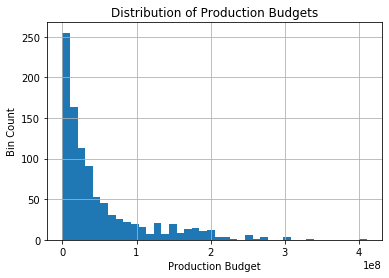

<Figure size 432x288 with 0 Axes>

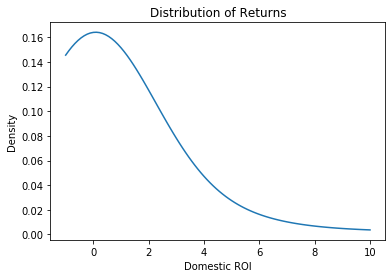

<Figure size 432x288 with 0 Axes>

In [253]:
plt.figure()
films.hist(column='production_budget',bins=40)
plt.xlabel('Production Budget')
plt.ylabel('Bin Count')
plt.title("Distribution of Production Budgets")
plt.show()
plt.savefig('graphs/Cost')

plt.figure()
films.domestic_roi.plot.kde(ind=np.linspace(-1,10,100))
plt.xlabel('Domestic ROI')
plt.ylabel('Density')
plt.title("Distribution of Returns")
plt.show()
plt.savefig('graphs/ROI_d')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

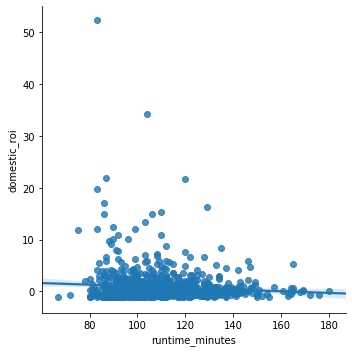

<Figure size 432x288 with 0 Axes>

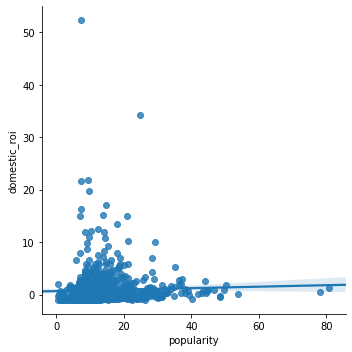

<Figure size 432x288 with 0 Axes>

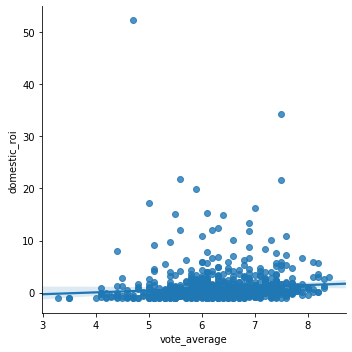

<Figure size 432x288 with 0 Axes>

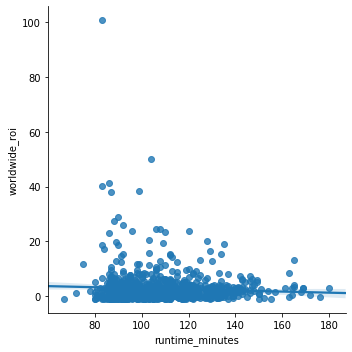

<Figure size 432x288 with 0 Axes>

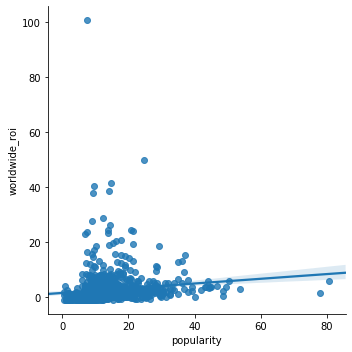

<Figure size 432x288 with 0 Axes>

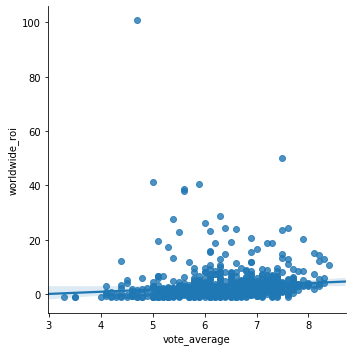

<Figure size 432x288 with 0 Axes>

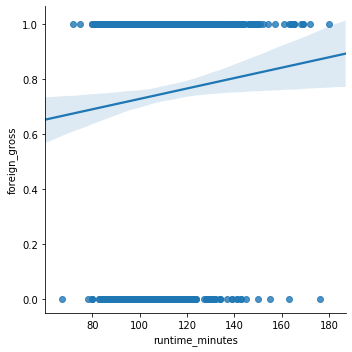

<Figure size 432x288 with 0 Axes>

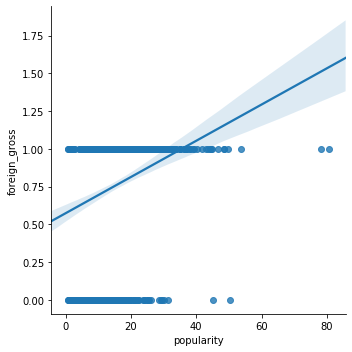

<Figure size 432x288 with 0 Axes>

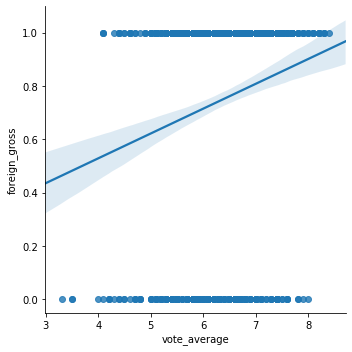

<Figure size 432x288 with 0 Axes>

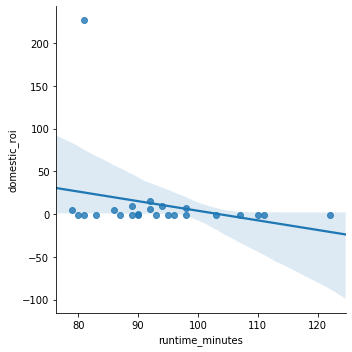

<Figure size 432x288 with 0 Axes>

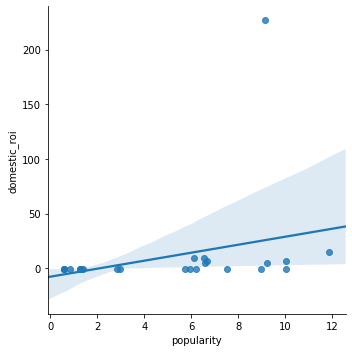

<Figure size 432x288 with 0 Axes>

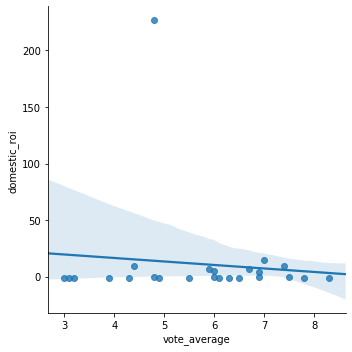

<Figure size 432x288 with 0 Axes>

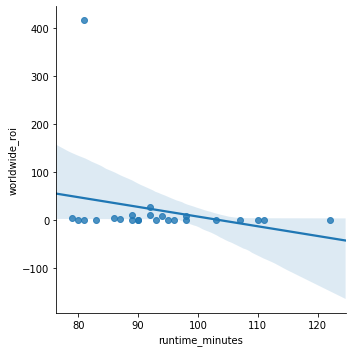

<Figure size 432x288 with 0 Axes>

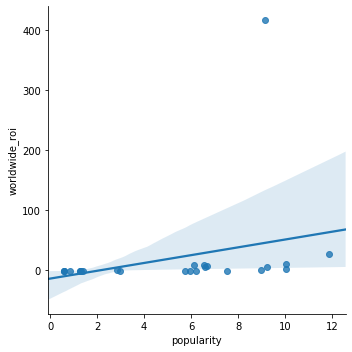

<Figure size 432x288 with 0 Axes>

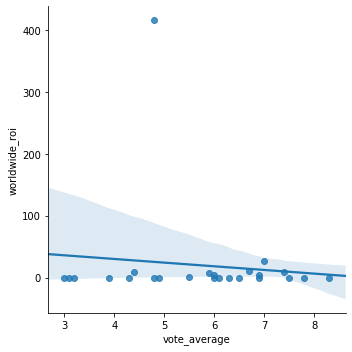

<Figure size 432x288 with 0 Axes>

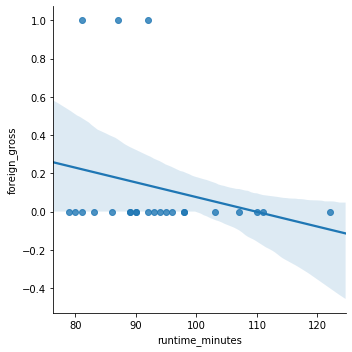

<Figure size 432x288 with 0 Axes>

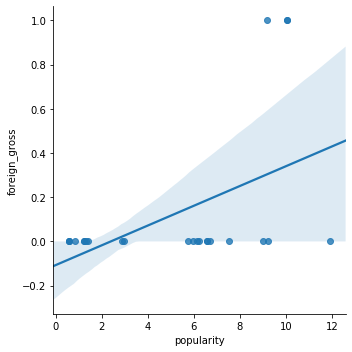

<Figure size 432x288 with 0 Axes>

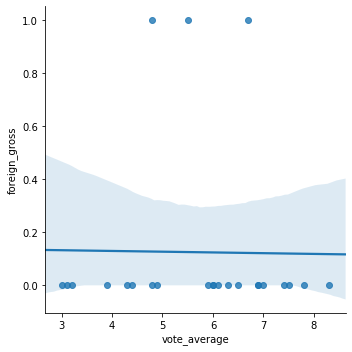

<Figure size 432x288 with 0 Axes>

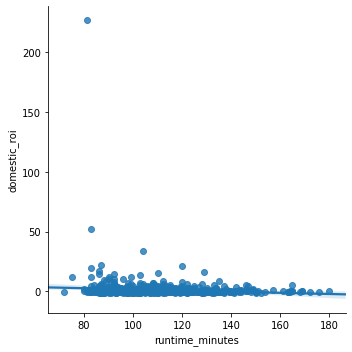

<Figure size 432x288 with 0 Axes>

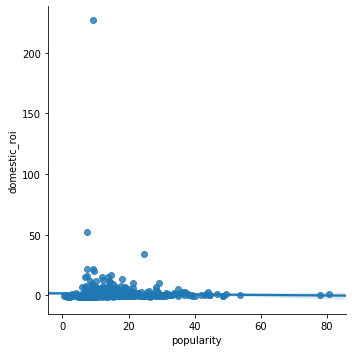

<Figure size 432x288 with 0 Axes>

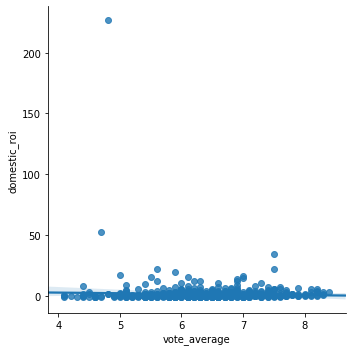

<Figure size 432x288 with 0 Axes>

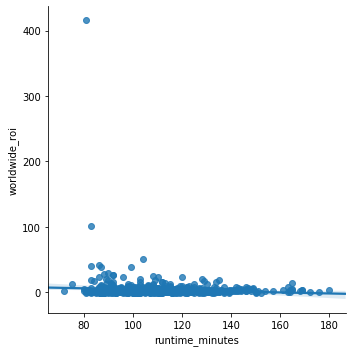

<Figure size 432x288 with 0 Axes>

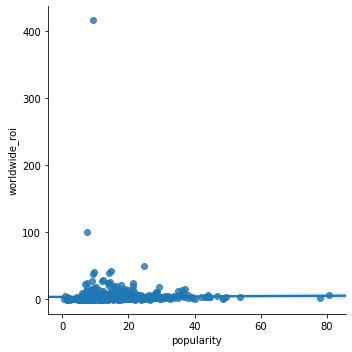

<Figure size 432x288 with 0 Axes>

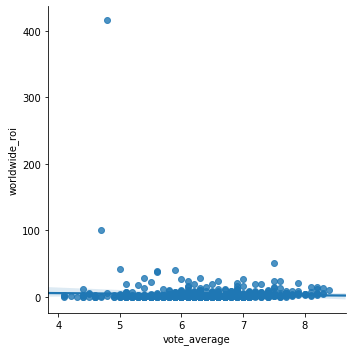

<Figure size 432x288 with 0 Axes>

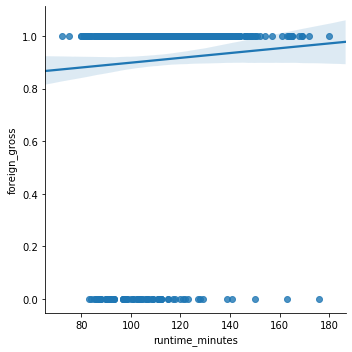

<Figure size 432x288 with 0 Axes>

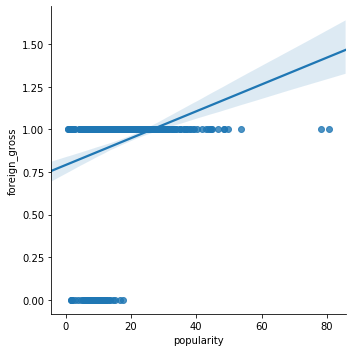

<Figure size 432x288 with 0 Axes>

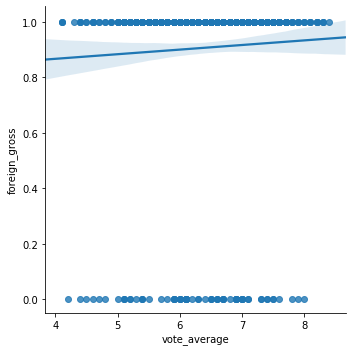

<Figure size 432x288 with 0 Axes>

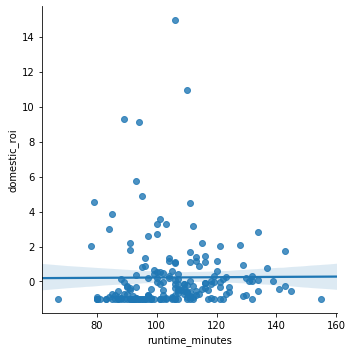

<Figure size 432x288 with 0 Axes>

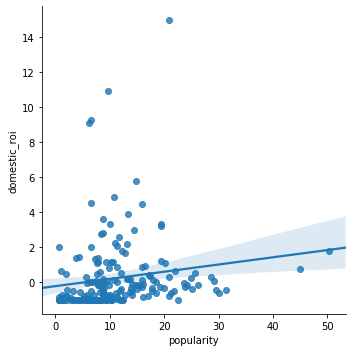

<Figure size 432x288 with 0 Axes>

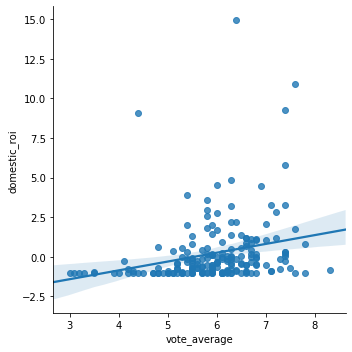

<Figure size 432x288 with 0 Axes>

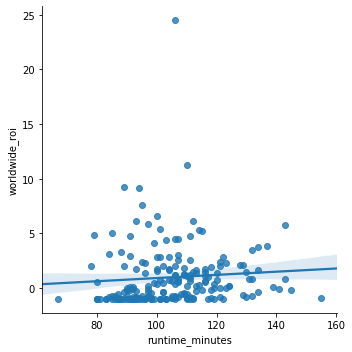

<Figure size 432x288 with 0 Axes>

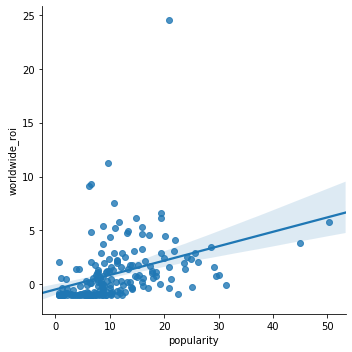

<Figure size 432x288 with 0 Axes>

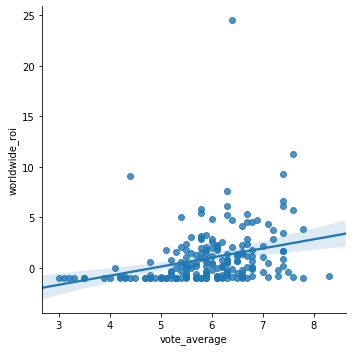

<Figure size 432x288 with 0 Axes>

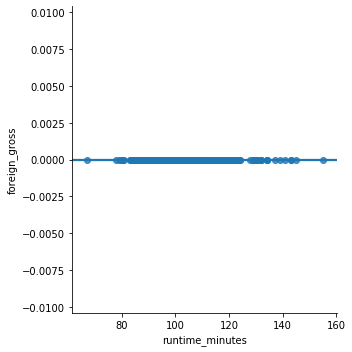

<Figure size 432x288 with 0 Axes>

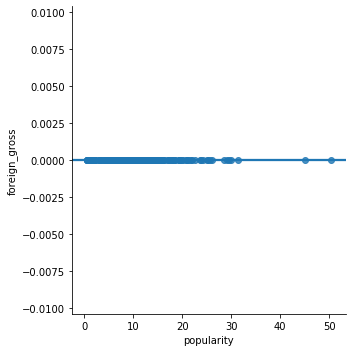

<Figure size 432x288 with 0 Axes>

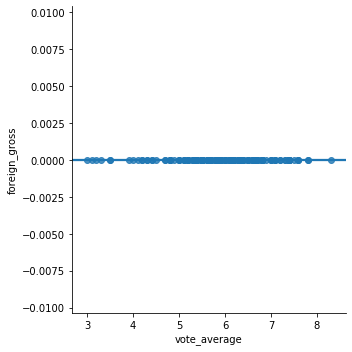

In [207]:

os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data/graphs')
fignum = 0
for sub in subsets:
    for depvar in dependent_vars:
        for indvar in indep_vars:
            fignum += 1
            plt.figure()
            plot = sns.lmplot(x=indvar,y=depvar,data=sub,fit_reg=True)
            plot.savefig("fig_{}".format(fignum))

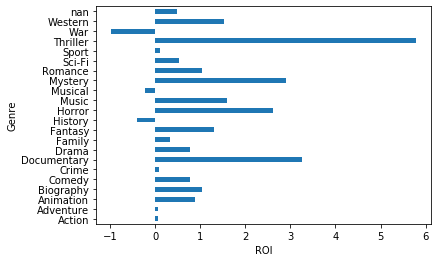

In [245]:
plt.figure()
df = films.groupby(['rgenre'])['domestic_roi'].mean()
df.plot.barh()
plt.xlabel('ROI')
plt.ylabel('Genre')
plt.show()

In [209]:
def regression(df,y,x):
        X = df[x] ## X usually means our input variables (or independent variables)
        Y = df[y] ## Y usually means our output/dependent variable
        X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

        # Note the difference in argument order for oridinary least squares (OLS)
        model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
        predictions = model.predict(X)

        # Print out the statistics
        print(model.summary())

In [220]:
regression(films,'domestic_roi',['year','runtime_minutes','popularity','production_budget',*genres])


                            OLS Regression Results                            
Dep. Variable:           domestic_roi   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.389
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           0.000161
Time:                        15:23:44   Log-Likelihood:                -3355.7
No. Observations:                 970   AIC:                             6763.
Df Residuals:                     944   BIC:                             6890.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -62.6710    219.14